<a href="https://colab.research.google.com/github/ComradeKommunist/TensorFlow-Lite-Final-Project/blob/main/Train_TFLite1_Object_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Lite v1 Object Detection API in Colab
**Author:** Evan Juras, [EJ Technology Consultants](https://ejtech.io)

**Last updated:** 10/12/22

**GitHub:** [TensorFlow Lite Object Detection](https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi)


# Introduction

This notebook implements [The TensorFlow Object Detection Library](https://github.com/tensorflow/models/tree/master/research/object_detection) for training an SSD-MobileNet model using your own dataset. Note that this notebook uses TensorFlow 1 rather than TensorFlow 2, because TensorFlow 1 works better for quantizing SSD-MobileNet models. If you want to use TensorFlow 2, [clink this link to go to the TensorFlow 2 version of this notebook](https://colab.research.google.com/github/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/blob/master/Train_TFLite2_Object_Detction_Model.ipynb).

*Note: This notebook is not maintained or updated as frequently as the TF2 notebook.*

I made a YouTube video that walks through the TensorFlow 2 notebook step by step, and the process is very similar for this TensorFlow 1 notebook. Please take a look at the video if you are confused about any steps in this notebook.

*Link to video to be added here*

###Working with Colab
Simply click the play button on sections of code to execute them. As the code executes, any outputs will be displayed in a block beneath the code. Once they're done executing, a green checkmark will appear next to the section to indicate it's finished running.

# 1. Install TensorFlow Object Detection Dependencies
First, we'll install the TensorFlow Object Detection API in this Google Colab instance. This requires cloning the [TensorFlow models repository](https://github.com/tensorflow/models) and running a couple installation commands. Click the play button to run the following sections of code.



In [33]:
# Install CUDA 10.0 (needed for TF v1.15.3)
!sudo apt-get update
!sudo apt-get install cuda-10.0

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [34]:
# Install cuDNN 7.6.0 (needed for TF v1.15.3)
# Download and extract cuDNN files
!wget https://www.dropbox.com/s/k6xqrje655q4aty/cudnn-10.0-linux-x64-v7.6.0.64.tgz
!tar -xf cudnn-10.0-linux-x64-v7.6.0.64.tgz

# Copy cuDNN libraries to appropriate folders
!sudo cp cuda/include/cudnn*.h /usr/local/cuda-10.0/include
!sudo cp -P cuda/lib64/libcudnn* /usr/local/cuda-10.0/lib64
!sudo chmod a+r /usr/local/cuda-10.0/include/cudnn*.h /usr/local/cuda-10.0/lib64/libcudnn*
!sudo cp -P cuda/lib64/libcudnn* /usr/lib64-nvidia

--2025-10-27 11:58:23--  https://www.dropbox.com/s/k6xqrje655q4aty/cudnn-10.0-linux-x64-v7.6.0.64.tgz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/72ebodu3vepxeu7423nwh/cudnn-10.0-linux-x64-v7.6.0.64.tgz?rlkey=vx24s9uqqhpe371j36069g9zs [following]
--2025-10-27 11:58:24--  https://www.dropbox.com/scl/fi/72ebodu3vepxeu7423nwh/cudnn-10.0-linux-x64-v7.6.0.64.tgz?rlkey=vx24s9uqqhpe371j36069g9zs
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca9b46328ef9fa3df60905481c8.dl.dropboxusercontent.com/cd/0/inline/C0BayymBwUoI9K35Bi6d2cbkOf2fo1p_6NvxeJLKxMZDIohhnyUk3GYm8fZOy08HjXotxhiT-CMEptq6KxAivLp4AVZc7l0IC-jZcWQxAEFb7NZMjEAHkScHJ-jfgXegjUKH294dY_y0dUzHWPEPLua5/file# [following]
--2025-10-27 11:58:24--  https://uc

In [35]:
# Clone the tensorflow models repository from GitHub
!git clone --depth 1 https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [38]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf1/setup.py .
python -m pip install --use-feature=2020-resolver .

Processing /content/models/mymodel/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for object_detection: filename=object_detection-0.1-py3-none-any.whl size=1697261 sha256=1b2d4188aa004e0247c18844d10fd3ab4eca1f097852c835a0f0203b24b7b248
  Stored in directory: /tmp/pip-ephem-wheel-cache-42_6rzyj/wheels/6d/1c/7d/63c4f44e6a159389507efe2114aaa4bfcb6df5c3f2329fa1ee
Successfully built object_detection
  Attempting uninstall: object_detection
    Found existing installation: object_detection 0.1
    Uninstalling object_detection-0.1:
      Successfully uninstalled object_detection-0.1


If you get any errors running the following code block, you can ignore them!

In [39]:
# Install TensorFlow
!pip install tensorflow-gpu==1.15.3

# A couple other packages have to be downgraded to work with the TF1 API
!pip install numpy==1.17.4
!pip install pycocotools==2.0.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15.3 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==1.15.3
  Using cached numpy-1.17.4.zip (6.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed cleaning build dir for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)


In [40]:
# Run Model Bulider Test file, just to verify everything's working properly
!python /content/models/research/object_detection/builders/model_builder_tf1_test.py


2025-10-27 12:00:32.217603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761566432.239271   12276 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761566432.245647   12276 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761566432.261647   12276 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761566432.261694   12276 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761566432.261698   12276 computation_placer.cc:177] computation placer alr

# 2. Upload Image Dataset and Prepare Training Data

In this section, we'll upload our training images and use TFRecord generation scripts to prepare the training data for TensorFlow. we'll upload our images, split them into train, validation, and test folders, and then run scripts for creating TFRecords from our data.

First, on your local PC, zip all your training images and XML files into a single folder called "images.zip". The files should be directly inside the zip folder (wihout any additional nested folders) as shown below:
```
images.zip
-- img1.jpg
-- img1.xml
-- img2.jpg
-- img2.xml
...
```
There are two options for moving the image files to this Colab instance: you can upload them directly, or you can copy them from your Google Drive. If you have a slow internet connection or more than 50MB worth of images, I recommend using Google Drive. Otherwise, you can just upload them through Colab.

#### Option 1. Upload through Google Colab
Upload the "images.zip" file to the Google Colab instance by clicking the "Files" icon on the left hand side of the browser, and then the "Upload to session storage" icon. Select the zip folder to upload it.

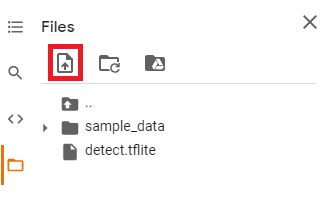

Once it's uploaded, we'll run a few commands to unzip it and set up our image directories. These directories are created in the /content folder in this instance's filesystem. You can browse the filesystem by clicking the "Files" icon on the left.


#### Option 2. Copy from Google Drive
You can also upload your images to your personal Google Drive, mount the drive on this Colab session, and copy them over to the Colab filesystem. This option works well if you want to upload the images beforehand so you don't have to wait for them to upload each time you restart this Colab.

First, upload the "images.zip" file to your Google Drive, and make note of the folder you uploaded them to. Replace `MyDrive/path/to/images.zip` with the path to your zip file. (For example, I uploaded the zip file to folder called "cat-toys1", so I would use `MyDrive/cat-toys1/images.zip` for the path). Then, run the following block of code to mount your Google Drive to this Colab session and copy the folder to this filesystem.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/path/to/images.zip /content

#### Option 3. Use my bird, squirrel, raccoon dataset
I've uploaded a dataset containing 800 labeled images of birds, squirrels, and raccoons. You can use this dataset if you just want to work through the process of training a TFLite model on custom data. Run the following code block to download the dataset.

In [ ]:
!wget -O /content/images.zip https://www.dropbox.com/s/en33x280e4z3wbt/BSR2.zip?dl=0

## Split images into train, validation, and test folders
At this point, whether you used Option 1, 2, or 3, you should be able to click the folder icon on the left and see your "images.zip" file in the list of files. Now that the dataset is uploaded, let's unzip it and create some folders to hold the images. These directories are created in the /content folder in this instance's filesystem. You can browse the filesystem by clicking the "Files" icon on the left.

In [54]:
# Remove existing images directory to ensure a clean start
!rm -rf /content/images

# Create necessary directories
!mkdir /content/images
!mkdir /content/images/all
!mkdir /content/images/train
!mkdir /content/images/validation
!mkdir /content/images/test

# Check if images.zip exists before attempting to unzip
import os
if os.path.exists('images.zip'):
    !unzip -q images.zip -d /content/images/all
else:
    print("Error: images.zip not found. Please upload your dataset or use one of the provided options.")

Error: images.zip not found. Please upload your dataset or use one of the provided options.


Next, we'll split the images into train, validation, and test sets. Here's what each set is used for:


*   **Train**: These are the actual images used to train the model. In each step of training, a batch of images from the "train" set is passed into the neural network. The network predicts classes and locations of objects in the images. The training algorithm calculates the loss (i.e. how "wrong" the predictions were) and adjusts the network weights through backpropagation.


*   **Validation**: Images from the "validation" set can be used by the training algorithm to check the progress of training and adjust hyperparameters (like learning rate). Unlike "train" images, these images are only used periodically during training (i.e. once every certain number of training steps).


* **Test**: These images are never seen by the neural network during training. They are intended to be used by a human to perform final testing of the model to check how accurate the model is.

I wrote a Python script to randomly move 80% of the images to the "train" folder, 10% to the "validation" folder, and 10% to the "test" folder. Click play on the following block to download the script and execute it.

In [56]:
!wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/train_val_test_split.py
!python train_val_test_split.py

--2025-10-27 12:03:18--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/train_val_test_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3100 (3.0K) [text/plain]
Saving to: ‘train_val_test_split.py.1’

train_val_test_spli 100%[===================>]   3.03K  --.-KB/s    in 0s      

2025-10-27 12:03:18 (30.0 MB/s) - ‘train_val_test_split.py.1’ saved [3100/3100]

Total images: 0
Images moving to train: 0
Images moving to validation: 0
Images moving to test: 0


## Create TFRecords
Finally, we need to convert the images into a data file format called TFRecords, which are used by TensorFlow for training. We'll use Python scripts to automatically convert the data into TFRecord format. Before running them, we need to define a labelmap for our classes.

The code section below will create a "labelmap.txt" file that contains a list of classes. Replace the `class1`, `class2`, `class3` text with your own classes (for example, `bird`, `squirrel`, `raccoon`), adding a new line for each class. Then, click play to execute the code.

In [57]:
### This creates a a "labelmap.txt" file with a list of classes the object detection model will detect.
%%bash
cat <<EOF >> /content/labelmap.txt
headphones
bottle
pen
wire
motion sensor
box
power supply
74hc595
magnifying glass
buzzer
led
resistor
protoboard
EOF

Download and run the data conversion scripts by clicking play on the following two sections of code. They will create TFRecord files for the train and validation datasets, as well as a `labelmap.pbtxt` file which contains the labelmap in a different format.

In [58]:
# Download data conversion scripts
! wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
! wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py

--2025-10-27 12:03:22--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1348 (1.3K) [text/plain]
Saving to: ‘create_csv.py.1’

create_csv.py.1     100%[===================>]   1.32K  --.-KB/s    in 0s      

2025-10-27 12:03:22 (55.2 MB/s) - ‘create_csv.py.1’ saved [1348/1348]

--2025-10-27 12:03:22--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.g

In [59]:
# Create CSV data files and TFRecord files
# Ensure we are in the /content directory to correctly access the images and labelmap files
%cd /content/

!python3 create_csv.py
!python3 create_tfrecord.py --csv_input=images/train_labels.csv --labelmap=labelmap.txt --image_dir=images/train --output_path=train.tfrecord
!python3 create_tfrecord.py --csv_input=images/validation_labels.csv --labelmap=labelmap.txt --image_dir=images/validation --output_path=val.tfrecord

/content
Successfully converted xml to csv.
Successfully converted xml to csv.
2025-10-27 12:03:26.069270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761566606.093096   13071 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761566606.100153   13071 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761566606.117456   13071 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761566606.117502   13071 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00

We'll store the locations of the TFRecord and labelmap files as variables so we can reference them later in this Colab session.

In [60]:
train_record_fname = '/content/train.tfrecord'
val_record_fname = '/content/val.tfrecord'
label_map_pbtxt_fname = '/content/labelmap.pbtxt'

# 3. Set Up Training Configuration

In this section, we'll set up an SSD-MobileNet model training configuration. We'll specifiy which pretrained TensorFlow model we want to use from the [TensorFlow 1 Object Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md). Each model also comes with a configuration file that points to file locations, sets training parameters (such as learning rate and total number of training steps), and more. We'll modify the configuration file for our custom training job.

The first section of code lists out some models availabe in the TF1 Model Zoo and defines some filenames that will be used later to download the model and config file. This makes it easy to manage which model you're using and to add other models to the list later.

Set the "chosen_model" variable to match the name of the model you'd like to train with. It's currently set to use the "ssd-mobilenet-v1-quantized" model. Then, click play on the next three sections to specify and download the pretrained model file and configuration file.


In [61]:
# Change the "chosen_model" variable to select one of the models listed below (from the TF1 object detection zoo)

chosen_model = 'ssd-mobilenet-v2-quantized'

MODELS_CONFIG = {
    'ssd-mobilenet-v1-quantized': {
        'model_name': 'ssd_mobilenet_v1_quantized_coco',
        'base_pipeline_file': 'ssd_mobilenet_v1_quantized_300x300_coco14_sync.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v1_quantized_300x300_coco14_sync_2018_07_18.tar.gz',
    },
    'ssd-mobilenet-v2-quantized': {
        'model_name': 'ssd_mobilenet_v2_quantized_coco',
        'base_pipeline_file': 'ssd_mobilenet_v2_quantized_300x300_coco.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz',
    }
}

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']

In [62]:
# Create "mymodel" folder for holding pre-trained weights and configuration files
%mkdir /content/models/mymodel/
%cd /content/models/mymodel/

# Download pretrained model file from TensorFlow Model Zoo
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/' + pretrained_checkpoint

!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

# Download base training configuration file
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/samples/configs/' + base_pipeline_file
!wget {download_config}

mkdir: cannot create directory ‘/content/models/mymodel/’: File exists
/content/models/mymodel
--2025-10-27 12:03:47--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.207, 172.217.203.207, 173.194.215.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144806142 (138M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz.5’

ssd_mobilenet_v2_qu 100%[===================>] 138.10M   222MB/s    in 0.6s    

2025-10-27 12:03:48 (222 MB/s) - ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz.5’ saved [144806142/144806142]



/tmp/ipython-input-3625659931.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


--2025-10-27 12:03:51--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4823 (4.7K) [text/plain]
Saving to: ‘ssd_mobilenet_v2_quantized_300x300_coco.config.5’

ssd_mobilenet_v2_qu 100%[===================>]   4.71K  --.-KB/s    in 0s      

2025-10-27 12:03:51 (34.2 MB/s) - ‘ssd_mobilenet_v2_quantized_300x300_coco.config.5’ saved [4823/4823]



Now that we've downloaded our model and config file, we need to modify the configuration file with some high-level training parameters. The following variables are used to control training steps:

* **num_steps**: The total amount of steps to use for training the model. A good number to start with is 40,000 steps. You can use more steps if you notice the loss metrics are still decreasing by the time training finishes. The more steps, the longer the training. Training can also be stopped early if loss flattens out before reaching the specified number of steps.
* **batch_size**: The number of images to use per training step. A larger batch size allows a model to be trained in fewer steps, but the size is limited by the GPU memory available for training. For the GPUs used in Colab instances, 16 is typically a good number.

* **quant_delay_steps**: (Only used for quantization-aware training) After this many steps, the training algorithm will insert "fake" quantization nodes in the network to simulate the effects of quantization. A good starting point is half the total number of training steps. More information is available [here](https://neuralet.com/article/quantization-of-tensorflow-object-detection-api-models/).

Other training information, like the location of the pretrained model file, the config file, and total number of classes are also assigned in this step.


In [63]:
# Set training parameters for the model
num_steps = 30000
batch_size = 16
quant_delay_steps = 15000

In [64]:
# Set file locations and get number of classes for config file
pipeline_fname = '/content/models/mymodel/' + base_pipeline_file
fine_tune_checkpoint = '/content/models/mymodel/' + model_name + '/model.ckpt'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print('Total classes:', num_classes)


Total classes: 52


Finally, we'll rewrite the config file to use the training parameters we just specified. The following section of code will automatically replace the necessary parameters in the downloaded .config file and save it as our custom "pipeline_file.config" file.

In [65]:
# Write custom configuration file by slotting our dataset, model checkpoint, and training parameters into the base pipeline file
# TO DO: change that description

import re

%cd /content/models/mymodel
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:

    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)

    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/mscoco_train.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/mscoco_val)(.*?")', 'input_path: "{}"'.format(val_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)

    # Fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)

    # Quantization delay steps
    s = re.sub(
        'delay: 48000', 'delay: {}'.format(quant_delay_steps), s)

    f.write(s)

%cd /content


/content/models/mymodel
writing custom configuration file
/content


In [66]:
# Display the custom configuration file's contents
!cat /content/models/mymodel/pipeline_file.config

# Quantized trained SSD with Mobilenet v2 on MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 52
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        asp

In [67]:
# Set the path to the custom config file, and the directory to store training checkpoints in
pipeline_file = '/content/models/mymodel/pipeline_file.config'
model_dir = '/content/training/'

The next block modifies the training script to save checkpoints once every 1000 training steps. Change `num_eval_steps` if you'd like to save checkpoints more or less frequently.

In [68]:
# Modify model_main.py to set evaluation and checkpoint interval
num_eval_steps = 1000
%cd /content/models/research/object_detection
print('Modifying model_main.py')


with open('model_main.py', 'r') as f:
  data = f.read()

  # Set eval steps
  data = data.replace('config = tf_estimator.RunConfig(model_dir=FLAGS.model_dir)',
             'config = tf.estimator.RunConfig(model_dir=FLAGS.model_dir, save_checkpoints_steps={})'.format(num_eval_steps))

  f.close()

!rm /content/models/research/object_detection/model_main.py

with open('model_main.py', 'w') as f:
  f.write(data)

%cd /content

/content/models/research/object_detection
Modifying model_main.py
/content


In [69]:
!cat /content/models/research/object_detection/model_main.py

# Copyright 2017 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Binary to run train and evaluation on object detection model."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from absl import flags

import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import estimator as tf_estimator

from object_de

# Train Custom TF1 Object Detector

We're ready to train our object detection model! Model training is performed using the "model_main_tf2.py" script from the TF Object Detection API. We've already defined all the parameters and arguments used by `model_main_tf2.py` in previous sections of this Colab. Training will take anywhere from 2 to 6 hours, depending on the model, batch size, and number of training steps. Just click Play on the following block to begin training!

*Note: It takes a few minutes for the program to display any training messages, because it only displays logs once every 100 steps. If it seems like nothing is happening, just wait a couple minutes.*

*Another note: If you want to stop training early, just click on the code block while it's running and press Ctrl+M to interrupt execution. You might have to press Ctrl+M a couple times and also click the Stop button or right-click and select "Interrupt Execution".*


In [70]:
!pip install tensorboard==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 42.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully uninstalled google-auth-oauthlib-1.2.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependenc

In [71]:
%load_ext tensorboard
%tensorboard --logdir '/content/training'

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 5, in <module>
    from tensorboard.main import run_main
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/main.py", line 27, in <module>
    from tensorboard import default
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/default.py", line 38, in <module>
    from tensorboard.plugins.graph import graphs_plugin
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/plugins/graph/graphs_plugin.py", line 30, in <module>
    from tensorboard.plugins.graph import keras_util
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/plugins/graph/keras_util.py", line 45, in <module>
    from tensorboard.compat.tensorflow_stub import dtypes
  File "/usr/local/lib/python3.12/dist-packages/tensorboard/compat/tensorflow_stub/__init__.py", line 22, in <module>
    from .dtypes import as_dtype  # noqa
    ^^^^^^^^^^^^^^^^^

In [72]:
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps}

2025-10-27 12:04:55.093014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761566695.236043   13490 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761566695.285452   13490 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761566695.400655   13490 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761566695.400964   13490 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761566695.400981   13490 computation_placer.cc:177] computation placer alr

# 5. Export Trained Inference Graph
In the left sidebar, click the folder icon to view the files in the `/content` folder. Click the `training` folder to expand it, and find the checkpoint with the highest number (e.g. `model.ckpt-29000`). Replace "XXXX" in the code section below with that number.

In [73]:
!mkdir /content/fine_tuned_model_lite
output_directory = '/content/fine_tuned_model_lite'

# Replace "XXXX" in the line below with the latest checkpoint in the /content/training directory
last_model_path = '/content/training/model.ckpt-30000'
print(last_model_path)

!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
    --trained_checkpoint_prefix {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

/content/training/model.ckpt-30000
2025-10-27 12:05:07.747273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761566707.782140   13548 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761566707.792637   13548 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761566707.817164   13548 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761566707.817218   13548 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761566707.817224   13548 computation_pl

# 6. Convert Model to TensorFlow Lite Format

In [74]:
localpb = '/content/fine_tuned_model_lite/tflite_graph.pb'
tflite_file = '/content/fine_tuned_model_lite/detect.tflite'

# Can use Netron app to determine the input size: https://www.electronjs.org/apps/netron
input_size = [1, 300, 300, 3]
input_shape = {"normalized_input_image_tensor" : input_size}

print(input_shape)

{'normalized_input_image_tensor': [1, 300, 300, 3]}


In [75]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_frozen_graph(
    localpb,
    ["normalized_input_image_tensor"],
    ["TFLite_Detection_PostProcess","TFLite_Detection_PostProcess:1","TFLite_Detection_PostProcess:2","TFLite_Detection_PostProcess:3"],
    input_shape
)

converter.allow_custom_ops = True
converter.inference_type = tf.uint8  # Tell converter to create a quantized model
converter.quantized_input_stats = {'normalized_input_image_tensor': (128, 128)}

tflite_model = converter.convert()

open(tflite_file,'wb').write(tflite_model)

# Test that the conversion was successful - if any errors are generated, something went wrong!
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

AttributeError: type object 'TFLiteConverterV2' has no attribute 'from_frozen_graph'

In [ ]:
!cp /content/labelmap.txt /content/fine_tuned_model_lite
!cp /content/labelmap.pbtxt /content/fine_tuned_model_lite
!zip -r /content/fine_tuned_model_lite.zip /content/fine_tuned_model_lite

Now, you can download the "detect.tflite" and "labelmap.txt" files and move them to your Raspberry Pi.

# (Optional) Test out TensorFlow Lite Model
Now that we've got our custom detection model trained and converted to TFLite format, let's try it out on some images. We'll use the images from our "test" folder. These images weren't seen at all by the model during training, so they'll give a faithful depiction of how accurate the model actually is.

The following code is used to import the TensorFlow Lite runtime, load it into memory, run inferencing on the test images, and display the results.

In [ ]:
# Copied from my TFLite repository, and stripped unneeded stuff out

# Import packages
import os
import cv2
import numpy as np
import sys
import glob
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

PATH_TO_IMAGES='/content/images/test'
PATH_TO_MODEL='/content/fine_tuned_model_lite/detect.tflite'
PATH_TO_LABELS='/content/labelmap.txt'
IMAGES_TO_TEST = 10
min_conf_threshold=0.5

# Grab all image filenames
images = glob.glob(PATH_TO_IMAGES + '/*.jpg')
images = images + glob.glob(PATH_TO_IMAGES + '/*.JPG')
images = images + glob.glob(PATH_TO_IMAGES + '/*.png')


# Load the label map into memory
with open(PATH_TO_LABELS, 'r') as f:
    labels = [line.strip() for line in f.readlines()]


# Load the Tensorflow Lite model into memory
interpreter = Interpreter(model_path=PATH_TO_MODEL)
interpreter.allocate_tensors()

# Get model details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

floating_model = (input_details[0]['dtype'] == np.float32)

input_mean = 127.5
input_std = 127.5

# Loop over every image and perform detection
for image_path in images[0:IMAGES_TO_TEST]:

    # Load image and resize to expected shape [1xHxWx3]
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imH, imW, _ = image.shape
    image_resized = cv2.resize(image_rgb, (width, height))
    input_data = np.expand_dims(image_resized, axis=0)

    # Normalize pixel values if using a floating model (i.e. if model is non-quantized)
    if floating_model:
        input_data = (np.float32(input_data) - input_mean) / input_std

    # Perform the actual detection by running the model with the image as input
    interpreter.set_tensor(input_details[0]['index'],input_data)
    interpreter.invoke()

    # Retrieve detection results
    boxes = interpreter.get_tensor(output_details[0]['index'])[0] # Bounding box coordinates of detected objects
    classes = interpreter.get_tensor(output_details[1]['index'])[0] # Class index of detected objects
    scores = interpreter.get_tensor(output_details[2]['index'])[0] # Confidence of detected objects
    #num = interpreter.get_tensor(output_details[3]['index'])  # Total number of detected objects (inaccurate and not needed)

    # Loop over all detections and draw detection box if confidence is above minimum threshold
    for i in range(len(scores)):
        if ((scores[i] > min_conf_threshold) and (scores[i] <= 1.0)):

            # Get bounding box coordinates and draw box
            # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
            ymin = int(max(1,(boxes[i][0] * imH)))
            xmin = int(max(1,(boxes[i][1] * imW)))
            ymax = int(min(imH,(boxes[i][2] * imH)))
            xmax = int(min(imW,(boxes[i][3] * imW)))

            cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

            # Draw label
            object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
            label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
            label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
            cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
            cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text

    # All the results have been drawn on the image, now display the image
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,16))
    plt.imshow(image)
    plt.show()

## (Optional) Compile Model for Edge TPU

Now that the model has been converted to TFLite and quantized, we can compile it to run on Edge TPU devices like the [Coral USB Accelerator](https://coral.ai/products/accelerator/) or the [Coral Dev Board](https://coral.ai/products/dev-board/). This allows the model to run much faster! For more information on the Edge TPU, see my [TensorFlow Lite repository on GitHub](fine_tuned_model_lite).

First, install the Edge TPU Compiler package inside this Colab instance.

In [ ]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
! sudo apt-get update
! sudo apt-get install edgetpu-compiler

Next, compile the model. (If your model has a different filename than "detect.tflite", use that instead.)

In [ ]:
%cd /content/fine_tuned_model_lite
!edgetpu_compiler detect.tflite
!mv detect_edgetpu.tflite edgetpu.tflite

The compiled model will be output in the /content folder as "detect_edgetpu.tflite". It gets renamed to "edgetpu.tflite" to be consistent with my code. Download this file using the command below. (If your model has a different filename than "edgetpu.tflite", use that instead.)

In [ ]:
%cd /content
!cp labelmap.txt fine_tuned_model_lite
!cp labelmap.pbtxt fine_tuned_model_lite
!zip -r fine_tuned_model_lite.zip fine_tuned_model_lite

In [ ]:
from google.colab import files

files.download('edgetpu.tflite')

Now you're all set to use the Coral model! For instructions on how to run an object detection model on the Raspberry Pi using the Coral USB Acclerator, please see my video, ["How to Use the Coral USB Accelerator with the Raspberry Pi"](https://www.youtube.com/watch?v=qJMwNHQNOVU).